# t-Student
Distribución y estadístico que aproxmiman a la normal cuando no se conoce el desvío de la muestra
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t
###### For the noncentral t distribution, see nct.

In [35]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

### Función de densidad t-Student

mean: 0.0, var: 3.7027027027027017, skew: nan, kurt: inf


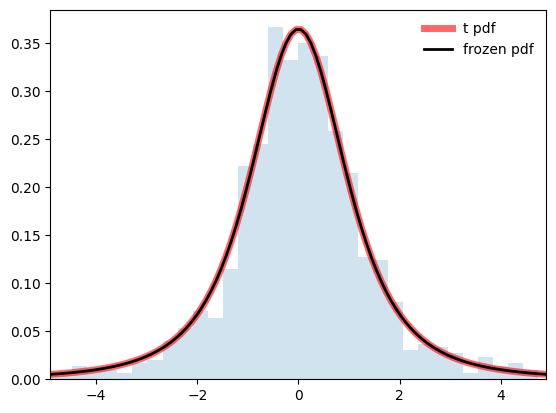

In [33]:
# 1. Calculamos los estadísticos
df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')
print(f"mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}")

# 2. Calculamos la función de densidad para 100 valores de x
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')

rv = t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = t.rvs(df, size=1000)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

### Variación de la distribución t-Student en función de los grados de libertad (df o v)

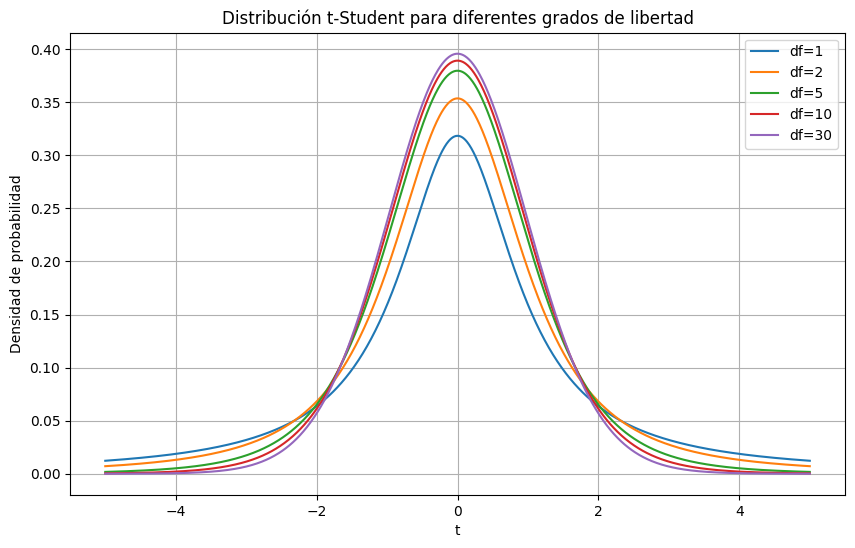

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Valores de t
x = np.linspace(-5, 5, 1000)

# Diferentes grados de libertad
dfs = [1, 2, 5, 10, 30]

# Graficar las distribuciones t-Student
plt.figure(figsize=(10, 6))

for df in dfs:
    t_dist = stats.t(df)
    plt.plot(x, t_dist.pdf(x), label=f'df={df}')

plt.title('Distribución t-Student para diferentes grados de libertad')
plt.xlabel('t')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


**Interpretacion**
+ Cuanto mayor es el grado de libertad (df o v) la curva se parece más a la de una distribución normal estandar

### a. Encuesta
+ Una muestra de tamaño n =  23 es una muestra aleatoria simple seleccionada de una población distribuida normalmente. 
+ Calcular el valor crítico tα/2 correspondiente a un nivel de confianza del 95%.

In [9]:
from scipy.stats import t

# Datos
n = 23
df = n - 1
confidence_level = 0.95
alpha = 1 - confidence_level

# Primero verificar los requisitos de t-Student
# a. Muestra aleatoria simple: cada posible muestra del mismo tamaño n tiene la misma posibilidad de ser elegida.
# b. n = 23. => n < 30. Pero el problema dice que la población está normalmente distribuida.
# c. No hay datos de 𝞂, por lo que al cumplier a y b se puede aplicar t-Student

# Valor crítico t para un nivel de confianza del 95%
# Una forma de calcular el valor crítico t es buscando el percentil correspondiente al (IC/2)
# area que queda fuera del intervalo de confianza dividido dos (da un t pedazo de la cola izquierda)
t_critical = t.ppf(1 - alpha/2, df)
print(f"Este es el valor critico t: {t_critical} a ambos lados de la media 0. O sea que es +- ese valor")

# Hay una función más concreta para esto que es .interval()
tmin, tmax = t.interval(confidence_level, df)
print(f"Intevalo de confianza {tmin} < µ < {tmax}")



Este es el valor critico t: 2.0738730679040147 a ambos lados de la media 0. O sea que es +- ese valor
Intevalo de confianza -2.0738730679040147 < µ < 2.0738730679040147


**Interpretación**
+ Existe un 95% de nivel de confianza o probabilidad de que el intervalo descripto (-2.07, +2.07) contenga al valor real de µ

### b. Efecto cocaína en bebés
+ En un estudio de los efectos sobre los bebés del consumo de cocaína durante el embarazo, se obtuvieron los siguientes datos de pesos al nacer:
    + n=190, X̅=2700 g, s=645 g 
    + (según datos de “Cognitive Outcomes of Preschool Children with Prenatal Cocaine Exposure”, 
       + de Singer et al., Journal of the American Medical Association, vol. 291, núm. 20). 
    + El diseño del estudio justifica el supuesto de que la muestra puede tratarse como una muestra aleatoria simple. 
+ Utilice los datos muestrales para construir un estimado del intervalo de confianza del 95% de µ, 
    + el peso medio al nacer de todos los bebés hijos de madres que consumieron cocaína durante el embarazo.

In [23]:
# Primero verificar los requisitos de t-Student
# a. Muestra aleatoria simple: cada posible muestra del mismo tamaño n tiene la misma posibilidad de ser elegida.
# b. n = 190. => n > 30. Aunque el problema no dice que la población está normalmente distribuida. n > 30 y se cumple el TCL.
# c. No hay datos de 𝞂, pero si de s.
n = 190
x = 2700
df = n -1
s = 645
se = s /n**0.5
confidence_level = 0.95

# Hay una función concreta para esto que es .interval()
print(f"Los datos dados y calculados son:")
print(f"Tamaño muestra: {n}, Grados de Libertad: {df}, Desvío Std: {s}, Error Std:{se}")
tmin, tmax = t.interval(confidence_level, df, loc=x, scale=se)
print(f"Resultado: Intevalo de confianza {tmin:.0f} < µ < {tmax:.0f}")

Los datos dados y calculados son:
Tamaño muestra: 190, Grados de Libertad: 189, Desvío Std: 645, Error Std:46.79321813209575
Resultado: Intevalo de confianza 2608 < µ < 2792


**Interpretación**
+ Con base en los datos muestrales, tenemos una confianza del 95% de que los límites de 2608 g y 2792 g realmente contienen el valor del peso medio al nacer. 
+ Ahora podemos comparar este resultado con un intervalo de confianza construido para los pesos al nacer de niños cuyas madres no consumieron cocaína.
+   (Ver ejercicio en otro jupiter notebook).

### Prueba t
+ El siguiente código de Python realiza una prueba t de una muestra para determinar si la media muestral de un conjunto de datos difiere significativamente de una media hipotética. 
+ En este caso, se evalúa si la media de un conjunto de 10 valores numéricos difiere significativamente de 15 utilizando una distribución t de Student.
+ Datos:
    + Se proporciona una lista de datos: [12, 14, 15, 13, 16, 14, 13, 14, 15, 14].
    + Se establece una media hipotética (𝜇hipotetica) de 15.
+ Cálculo de la Media y Desviación Estándar Muestral:
    + Se calcula la media muestral 𝑥ˉ y la desviación estándar muestral 𝑠 de los datos proporcionados.
+ Cálculo del Valor t:
    + Se calcula el valor t utilizando la fórmula: 𝑡=𝑥ˉ−𝜇hipotetica/(𝑠/sqr(𝑛))
    + Este valor t mide cuántas desviaciones estándar se encuentra la media muestral de la media hipotética.
+ Grados de libertad: 
    Los grados de libertad (𝑑𝑓) se calculan como 𝑛−1.
+ Cálculo del Valor p:
    + El valor p se calcula utilizando la distribución t de Student. 
        + Indica la probabilidad de obtener un valor t al menos tan extremo como el observado, 
            + bajo la suposición de que la media hipotética es verdadera.
+ Comparación con el Valor Crítico t:
    + Se compara el valor t observado con el valor crítico t para un nivel de significancia del 5% (𝛼=0.05).
        + El valor crítico t se obtiene de la distribución t de Student para 𝑑𝑓 grados de libertad.

In [34]:

# Prueba t
# Datos de ejemplo
datos = [12, 14, 15, 13, 16, 14, 13, 14, 15, 14]
mu_hipotetica = 15

# Calcular media y desviación estándar muestral
x_bar = np.mean(datos)
s = np.std(datos, ddof=1)
n = len(datos)

# Calcular el valor de t
t = (x_bar - mu_hipotetica) / (s / np.sqrt(n))

# Grados de libertad
df = n - 1

# Valor p
p_value = 2 * (1 - stats.t.cdf(np.abs(t), df))

print(f"Valor t: {t:.2f}")
print(f"Valor p: {p_value:.4f}")

# Comparar con el valor crítico para un nivel de significancia del 5%
alpha = 0.05
t_critico = stats.t.ppf(1 - alpha/2, df)

print(f"Valor crítico t para α={alpha}: ±{t_critico:.2f}")


Valor t: -2.74
Valor p: 0.0229
Valor crítico t para α=0.05: ±2.26


**Interpretación**
1. Si el valor p es menor que el nivel de significancia (𝛼=0.05), se rechaza la hipótesis nula de que la media muestral es igual a la media hipotética.
2. En este caso, el valor p (0.2535) es mayor que 0.05, por lo tanto, no se rechaza la hipótesis nula.
3. Concluimos que no hay evidencia suficiente para afirmar que la media del conjunto de datos difiere significativamente de 15.
4. En resumen, el análisis muestra que, basado en los datos proporcionados, 
    + no hay evidencia suficiente para concluir que la media de los datos difiere de la media hipotética de 15 al nivel de significancia del 5%.

___________________________________________________________________________________________________________________________________________________________